# Universidade Federal de Campina Grande (UFCG)

Professor: Eanes Torres

Disciplina: Inteligência Artificial

Tema: **Detecção de Anomalias/Fraudes em transações de cartão de crédito**

Integrantes:

* Cleanto Santos de Macedo Neto - 123210602

* Darlan dos Santos Almeida - 123210180

* João Vitor Moitinho Barbosa - 123210551

* Maria Clara Silva Maia - 122210366

* Eduardo Nogueira Severo de Macêdo - 123210308

#Descrição Dataset

O conjunto de dados contém transações realizadas com cartões de crédito em setembro de 2013.
Este conjunto de dados apresenta transações que ocorreram em dois dias.

Ele contém apenas variáveis ​​de entrada numéricas que são o resultado de uma transformação PCA. Devido a questões de confidencialidade, não fornece as características originais e mais informações de contexto sobre os dados. As características V1, V2, … V28 são os componentes principais obtidos com PCA; as únicas características que não foram transformadas com PCA são 'Tempo' e 'Valor'. A característica 'Tempo' contém os segundos decorridos entre cada transação e a primeira transação no conjunto de dados. A característica 'Valor' é o valor da transação. A característica 'Classe' assume o valor 1 em caso de fraude e 0 caso contrário.

#Analise Quantitativa

In [ ]:
'''
Importação das Bibliotecas e DataSet
'''

import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = "creditcard.csv"

df = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "mlg-ulb/creditcardfraud",
  file_path,
)

df.head()

Using Colab cache for faster access to the 'creditcardfraud' dataset.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.shape
#Retorna uma tupla que representa as dimensões do DataFrame
#O primeiro valor é o número de registros e o segundo valor é o número de características

(284807, 31)

In [ ]:
#Exibe o tipo de dado de cada coluna '''
df.dtypes.head(5) # todos são float64

,0
Time,float64
V1,float64
V2,float64
V3,float64
V4,float64


In [ ]:
df.info()

#Parametro geral de informações sobre o DataFrame
#Nome das colunas, Quantidade de linhas com valores Non-Null e Tipo de cada coluna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
print(df.describe())
"""
Descreve numericamente os dados do DataFrame
Count -> Quantidade de Amostras
Mean -> Média dos valores das Colunas
Std -> Desvio Padrão dos valores das Colunas
Min -> Valor Mínimo das Colunas
25% -> Quartil inferior (25% dos valores estão abaixo ou são iguais a esse número)
50% -> Mediana
75% -> Quartil superior (75% dos valores estão abaixo ou são iguais a esse número)
Max -> Valor Maximo das Colunas
"""

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

'\nDescreve numericamente os dados do DataFrame\nCount -> Quantidade de Amostras\nMean -> Média dos valores das Colunas\nStd -> Desvio Padrão dos valores das Colunas\nMin -> Valor Mínimo das Colunas\n25% -> Quartil inferior (25% dos valores estão abaixo ou são iguais a esse número)\n50% -> Mediana\n75% -> Quartil superior (75% dos valores estão abaixo ou são iguais a esse número)\nMax -> Valor Maximo das Colunas\n'

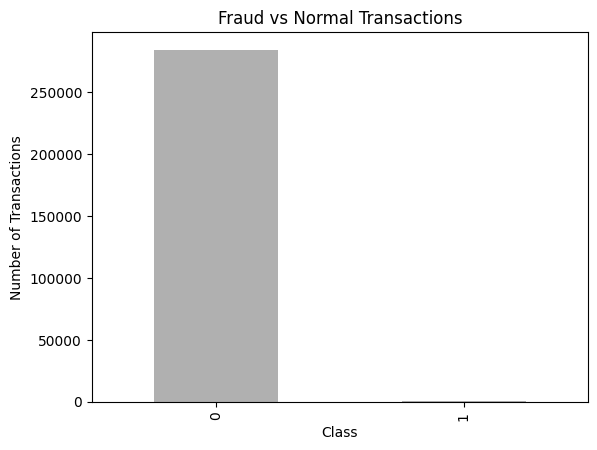

In [ ]:
df["Class"].value_counts().plot(kind="bar", color='#B0B0B0')
plt.title("Fraud vs Normal Transactions")
plt.xlabel("Class")
plt.ylabel("Number of Transactions")
plt.show()


#Representação visual da quantidade de transações normais e fraudulentas

In [ ]:
df["Class"].value_counts(normalize=True) * 100

#Representação em porcentagem da quantidade de transações normais e fraudulentas

,proportion
Class,
0,99.827251
1,0.172749


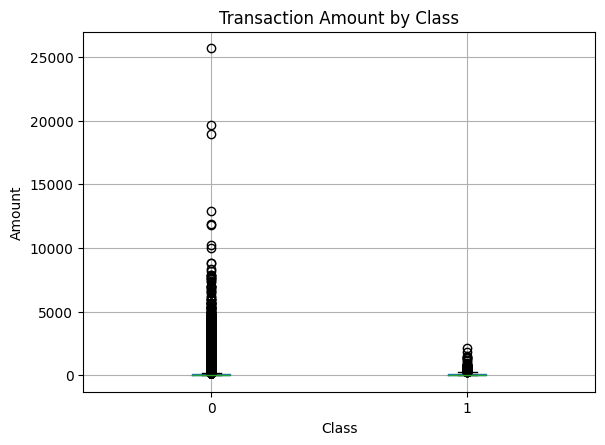

'\nRepresentação visual da distribuição dos valores de transação por classe\n'

In [ ]:
df.boxplot(column="Amount", by="Class")
plt.title("Transaction Amount by Class")
plt.suptitle("")
plt.xlabel("Class")
plt.ylabel("Amount")
plt.show()

'''
Representação visual da distribuição dos valores de transação por classe
'''

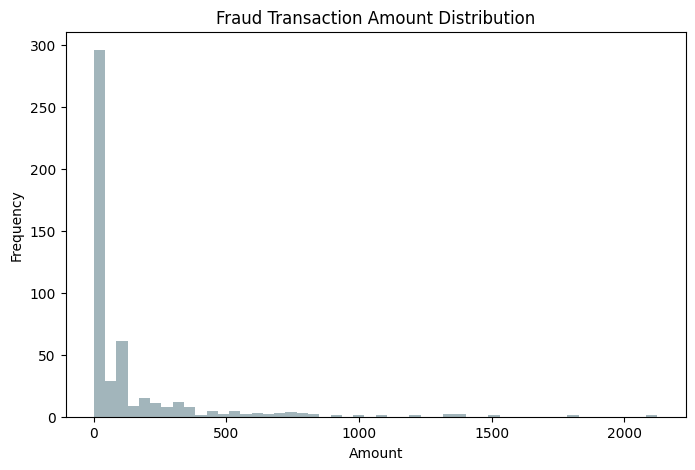

'\nRepresentação visual da distribuição dos valores de transação fraudulentas\n'

In [ ]:
plt.figure(figsize=(8,5))
df[df["Class"] == 1]["Amount"].plot(kind="hist", bins=50, color='#A2B5BB')
plt.title("Fraud Transaction Amount Distribution")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

'''
Representação visual da distribuição dos valores de transação fraudulentas
'''

# Classificação


## Comum

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import pandas as pd

X = df.drop("Class", axis=1).values
y = df["Class"].values

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

models = {
    "RandomForest": (
        RandomForestClassifier(class_weight="balanced", random_state=42),
        {
            "n_estimators": [100, 200],
            "max_depth": [None, 10, 20],
        },
    ),

    "ExtraTrees": (
        ExtraTreesClassifier(class_weight="balanced", random_state=42),
        {
            "n_estimators": [100, 200],
            "max_depth": [None, 10, 20],
        },
    ),

    "GradientBoosting": (
        GradientBoostingClassifier(random_state=42),
        {
            "n_estimators": [100, 200],
            "learning_rate": [0.05, 0.1],
            "max_depth": [3, 5],
        },
    ),

    "SVM": (
        SVC(class_weight="balanced"),
        {
            "C": [0.1, 1, 10],
            "kernel": ["rbf"],
            "gamma": ["scale", "auto"],
        },
    ),

    "LogisticRegression": (
        LogisticRegression(max_iter=1000, class_weight="balanced"),
        {
            "C": [0.1, 1, 10],
        },
    ),

    "KNN": (
        KNeighborsClassifier(),
        {
            "n_neighbors": [3, 5, 7],
        },
    ),

    "MLP": (
        MLPClassifier(max_iter=50, random_state=42),
        {
            "hidden_layer_sizes": [(64,), (128, 64)],
            "alpha": [0.0001, 0.001],
        },
    ),
}


results = []

for name, (model, grid) in models.items():
    print(f"Treinando {name}...")

    search = GridSearchCV(
        model,
        grid,
        scoring="recall",  # prioriza pegar fraude
        cv=3,
        n_jobs=-1
    )

    search.fit(X_train, y_train)

    best_model = search.best_estimator_

    pred = best_model.predict(X_test)

    report = classification_report(y_test, pred, output_dict=True)

    results.append({
        "modelo": name,
        "best_params": search.best_params_,
        "recall_fraude": report["1"]["recall"],
        "precision_fraude": report["1"]["precision"],
        "f1_fraude": report["1"]["f1-score"],
    })

results_df = pd.DataFrame(results).sort_values(
    by="recall_fraude", ascending=False
)

print(results_df)


Treinando RandomForest...


## Por meio de autoencoders

-Como:
1. Por meio de autocodificadores
2. Distribuir pesos de acordo com a proporção, ou seja, 1:1000 para a classe negativa(não fraude) e 9999/1000 para a classe positiva(fraude)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
X = df.drop("Class", axis=1).values
y = df["Class"].values

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)


In [ ]:
input_dim = X_train.shape[1] # sabemos que é 30
encoding_dim = 8

input_layer = keras.Input(shape=(input_dim,))

# Encoder
encoded = layers.Dense(128, activation="relu")(input_layer)
encoded = layers.Dense(64, activation="relu")(encoded)
bottleneck = layers.Dense(encoding_dim, activation="relu")(encoded)

# Decoder
decoded = layers.Dense(64, activation="relu")(bottleneck)
decoded = layers.Dense(128, activation="relu")(decoded)
output_layer = layers.Dense(input_dim, activation="linear")(decoded)

autoencoder = keras.Model(input_layer, output_layer)



In [ ]:
autoencoder.compile(optimizer="adam", loss="mse")

autoencoder.fit(
    X_train, X_train,
    epochs=50,
    batch_size=256,
    validation_split=0.1,
    verbose=1
)


Epoch 1/50
802/802 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.6147 - val_loss: 0.2918
Epoch 2/50
802/802 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.2783 - val_loss: 0.2337
Epoch 3/50
802/802 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.2261 - val_loss: 0.2074
Epoch 4/50
802/802 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.2040 - val_loss: 0.2036
Epoch 5/50
802/802 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.1864 - val_loss: 0.1826
Epoch 6/50
802/802 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.1753 - val_loss: 0.1724
Epoch 7/50
802/802 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.1670 - val_loss: 0.1577
Epoch 8/50
802/802 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.1621 - val_loss: 0.1578
Epoch 9/50
802/802 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.1543 - val_loss: 0.1642
Epoch 10/50
802/802 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.1496 - val_loss: 0.1507
Epoch 11/50
802/802 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.1509 - val_loss: 0.1418
Epoch 12/50
802/802 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step

In [ ]:
encoder = keras.Model(input_layer, bottleneck)

In [ ]:
X_train_enc = encoder.predict(X_train)
X_test_enc = encoder.predict(X_test)

print(X_train_enc.shape)  # (n_amostras, 8)


7121/7121 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 952us/step
(227845, 8)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

clf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

clf.fit(X_train_enc, y_train)

pred = clf.predict(X_test_enc)

print(classification_report(y_test, pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.93      0.72      0.82        98

    accuracy                           1.00     56962
   macro avg       0.97      0.86      0.91     56962
weighted avg       1.00      1.00      1.00     56962



## Benchmark Encoder + Classificador

In [ ]:
import itertools
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report



encoding_dims = [4, 8, 16]

encoder_archs = [
    [128, 64],
    [64, 32],
]

classifiers = {
    "RF": RandomForestClassifier(
        n_estimators=200, class_weight="balanced", random_state=42, n_jobs=-1
    ),
    "SVM": SVC(class_weight="balanced"),
}

results = []

=

for enc_dim, arch in itertools.product(encoding_dims, encoder_archs):
    print(f"\nEncoder: {arch} -> {enc_dim}")

    input_layer = keras.Input(shape=(input_dim,))
    x = input_layer

    for units in arch:
        x = layers.Dense(units, activation="relu")(x)

    bottleneck = layers.Dense(enc_dim, activation="relu")(x)

    x = bottleneck
    for units in reversed(arch):
        x = layers.Dense(units, activation="relu")(x)

    output_layer = layers.Dense(input_dim, activation="linear")(x)

    autoencoder = keras.Model(input_layer, output_layer)
    autoencoder.compile(optimizer="adam", loss="mse")

    autoencoder.fit(
        X_train, X_train,
        epochs=30,
        batch_size=256,
        validation_split=0.1,
        verbose=0
    )


    encoder = keras.Model(input_layer, bottleneck)
    X_train_enc = encoder.predict(X_train, verbose=0)
    X_test_enc = encoder.predict(X_test, verbose=0)

    for name, clf in classifiers.items():
        print(f"  Classificador: {name}")

        clf.fit(X_train_enc, y_train)
        pred = clf.predict(X_test_enc)

        report = classification_report(y_test, pred, output_dict=True)

        results.append({
            "encoder_arch": arch,
            "encoding_dim": enc_dim,
            "model": name,
            "recall_fraude": report["1"]["recall"],
            "precision_fraude": report["1"]["precision"],
            "f1_fraude": report["1"]["f1-score"],
        })


results_df = pd.DataFrame(results).sort_values(
    by="recall_fraude", ascending=False
)

print(results_df.head(10))
